# 02 EDA and Descriptive Statistics

## Objectives

- Explore distributions and trends
- Produce summary statistics for dashboard context
- Create export-ready tables if needed

## Inputs

- data/processed/v1/environmental_trends_clean.csv

## Outputs

- EDA visuals and summary tables (embedded in notebook)

## Additional Comments

- Keep interpretations cautious and avoid causal claims

## Purpose and Context

This notebook performs **Exploratory Data Analysis (EDA)** to understand patterns, distributions, and relationships in our environmental data *before* formal hypothesis testing or modeling.

**Connection to project guidelines:**

- **Communication (LO2.1, LO2.2)**: Visualizations and summary statistics communicate insights to both technical and non-technical audiences
- **Ethics (LO1.1)**: Cautious interpretation of correlations prevents overconfident causal claims
- **Documentation (LO2.3)**: Embedded visualizations and explanations make the analysis transparent

**Key principle: Association ≠ Causation**

Throughout this notebook, we'll identify *patterns* and *associations* in the data. However:
- Correlation does not prove one variable causes changes in another
- Many confounding factors affect climate (geography, economics, policy, etc.)
- We communicate findings as "associated with" rather than "caused by"

This responsible approach ensures our dashboard doesn't mislead users about what the data can (and cannot) tell us.

---

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
os.getcwd()

'c:\\Users\\sergi\\OneDrive\\Documents\\Code Institute Data analytics\\Capstone project 3\\Global_environmental_trends_2000_2024\\global_env_trend'

# Load processed data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clean_path = "data/processed/v1/environmental_trends_clean.csv"
df = pd.read_csv(clean_path)
df.head()

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


# Summary statistics

**What summary statistics reveal:**

The `.describe()` method provides key statistical measures for each numeric variable:

- **Count**: How many valid (non-missing) values exist
- **Mean**: Average value (useful for understanding typical levels)
- **Std (standard deviation)**: How much variation exists (high std = more variability)
- **Min/Max**: Range of values (helps identify outliers or data errors)
- **25%, 50%, 75% (quartiles)**: Distribution shape (is data skewed or symmetric?)

**Why this matters for our project:**

Understanding distributions helps us:
- Identify countries or years with unusual values
- Choose appropriate visualizations (histograms for skewed data, etc.)
- Set realistic expectations for model performance

In [3]:
df.describe(include="all").T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,156.0,NaN,NaN,NaN,2012.333333,8.326664,2000.0,2005.0,2012.5,2020.0,2024.0
Country,156,19,Germany,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Temperature_degC,156.0,NaN,NaN,NaN,17.620513,7.221658,5.1,12.8,15.5,25.225,28.5
CO2_Emissions_tons_per_capita,156.0,NaN,NaN,NaN,7.673718,5.450198,0.5,2.175,7.35,10.8,20.2
Sea_Level_Rise_mm,156.0,NaN,NaN,NaN,24.333333,16.916239,0.0,10.0,23.5,36.0,59.0
Rainfall_mm,156.0,NaN,NaN,NaN,937.397436,532.954803,54.0,576.0,775.5,1151.75,2726.0
Population,156.0,NaN,NaN,NaN,295207512.057692,441478615.761624,19153000.0,54487500.0,123087256.5,213200000.0,1426000000.0
Renewable_Energy_pct,156.0,NaN,NaN,NaN,31.203846,26.741843,0.0,14.85,19.8,43.05,87.2
Extreme_Weather_Events,156.0,NaN,NaN,NaN,20.185897,10.95198,2.0,12.75,18.0,25.0,64.0
Forest_Area_pct,156.0,NaN,NaN,NaN,32.191667,18.335613,0.5,17.225,32.0,48.125,68.5


# Trend checks (example)

**Exploring temperature trends over time:**

This visualization shows how global average temperature has changed from 2000 to 2024.

**How to interpret:**
- **Upward slope**: Indicates warming trend
- **Variability**: Year-to-year fluctuations are normal due to natural climate cycles
- **Acceleration**: If the slope steepens in recent years, warming may be accelerating

**Important caveat**: This is an *average across all countries*. Individual countries may show different patterns. The dashboard will allow users to explore country-specific trends.

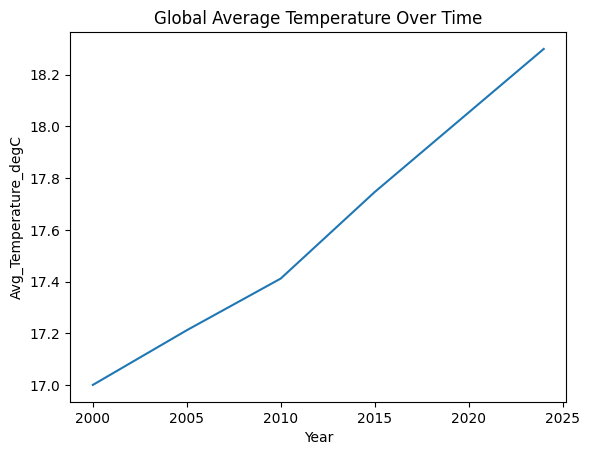

In [4]:
# Example: plot global average temperature over time
trend = df.groupby("Year")["Avg_Temperature_degC"].mean()
trend.plot()
plt.title("Global Average Temperature Over Time")
plt.ylabel("Avg_Temperature_degC")
plt.show()

# Correlation scan (example)

**Understanding correlations between environmental variables:**

A correlation heatmap shows how pairs of variables move together:

- **Positive correlation (red)**: When one increases, the other tends to increase
- **Negative correlation (blue)**: When one increases, the other tends to decrease
- **No correlation (white)**: Variables move independently

**Values range from -1 to +1:**
- 0.7 to 1.0: Strong positive relationship
- 0.3 to 0.7: Moderate positive relationship
- -0.3 to 0.3: Weak or no relationship
- -0.7 to -0.3: Moderate negative relationship
- -1.0 to -0.7: Strong negative relationship

**⚠️ Critical limitation - Correlation ≠ Causation:**

Even strong correlations do NOT prove that one variable *causes* changes in another. Many factors influence climate:
- Historical emissions accumulate over decades
- Local geography affects temperature (coastal vs inland, elevation, etc.)
- Policy changes take years to show effects
- Economic development affects both emissions and energy transitions

**Responsible interpretation**: We can say CO2 and temperature are *associated*, but we cannot claim CO2 emissions directly cause temperature changes in our simple analysis. More sophisticated climate science studies use complex models and controlled experiments to establish causal mechanisms.

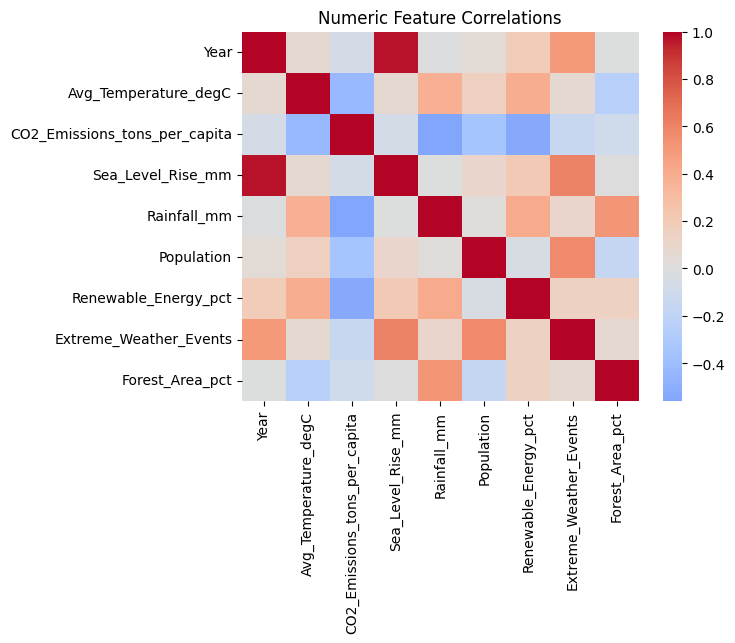

In [5]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Numeric Feature Correlations")
plt.show()